

```
Time Series
```



# Time Series - ARIMA

**Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.**

![](https://i.pinimg.com/originals/6e/8a/45/6e8a45b41425813c606412e3b9e78cb8.jpg)

Here the **Objective** is- Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in date/time and the passengers travelling per month

**Time Series:**<br>
Time Series is a series of observations taken at particular time intervals (usually equal intervals). Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

**Why & where Time Series is used?**<br>
Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:
1. Business Forecasting
2. Understanding past behavior
3. Plan the future
4. Evaluate current accomplishment

**Importance of Time Series Analysis:**<br>
Ample of time series data is being generated from a variety of fields. And hence the study time series analysis holds a lot of applications. Let us try to understand the importance of time series analysis in different areas.
1. Economics
2. Finance
3. Healthcare
4. Environmental Science
5. Sales Forecasting

**What are the components of Time Series?**<br>
There are 4 components:
**1. Trend** - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.
**2. Seasonality** - seasonal variances. Eq: Ice cream sales increases in Summer only
**3. Noise or Irregularity** - Spikes & troughs at random intervals
**4. Cyclicity** - behavior that repeats itself after large interval of time, like months, years etc.

**What is Stationarity?**<br>
Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
1. It should have constant mean.
2. It should have constant variance or standard deviation.
3. Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationary.

**Why does Timeseries has to be Stationary?**<br>
Stationary data means mean and standard deviation of data does not change WRT time. The mean across many time periods is only informative if the expected value is the same across those time periods. We make the data stationary in case of ARIMA because the arima model looks at the past data to predict the future values.

**Tests to check if a series is stationary or not:**<br>
There are 2 ways to check for Stationarity of a Timeseries:<br>
**1. Rolling Statistics** - Plot the moving avg(mean) or moving standard deviation to see if it varies with time. It is a visual technique.<br>
**2. ADCF Test** - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a Timeseries is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

**What Is ADCF test?**<br>
In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

p value(0<=p<=1) should be as low as possible. Critical values at different confidence intervals should be close to the Test statistics value.

**What is ARIMA model?**<br>
ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags), d(order of differentiation) and Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

**How to find value of P & Q for ARIMA ?**<br>
We need to take help of **ACF(Auto Correlation Function)** & **PACF(Partial Auto Correlation Function)** plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q

**What is Exponential Smoothing?**<br>
Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

#Import the ness lib.

#Load the dataset

#EDA-------->DA

#FE---<ENCODING/RESCALING

#FS--->RFE,CHI,COR,IV,VIF ETC

#MODEL BUILDING

#Model evalution

#model deployment


In [ ]:
#dataset link-https://drive.google.com/file/d/1NmrgIfRykuDnGLEfmxWYatoRbWHXGvti/view?usp=sharing

In [ ]:
import pandas as pd #manipulation
import numpy as np #numerical python
import matplotlib.pyplot as plt #visual
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose #visual representation of seasonal decompose
from statsmodels.tsa.stattools import acf,pacf #ploting acf and pacf graph
from statsmodels.tsa.arima_model import ARIMA  # modeling

In [ ]:
#load the data
data=pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()


,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
12*12

144

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#data.set_index('Month', inplace = True)

In [ ]:
data['Month']=pd.to_datetime(data['Month']) #converting month column obj to date time
data.index=data['Month']  #making month column as index column

In [ ]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
del data['Month']  #del DataFrame[columnName]--->syntax

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

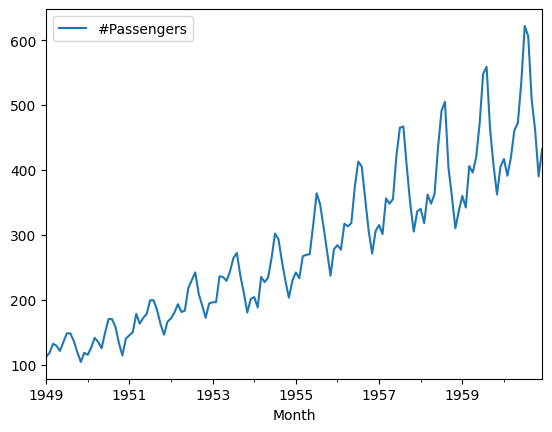

In [ ]:
data.plot()

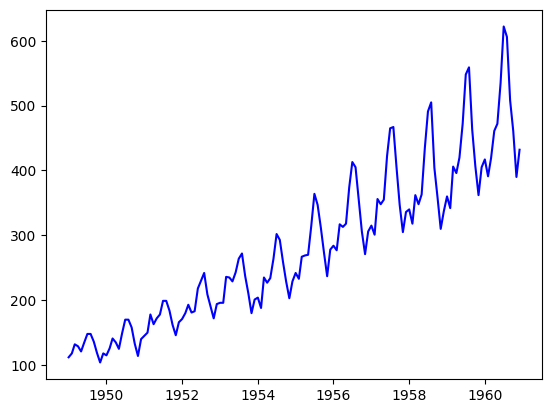

In [ ]:
plt.plot(data,color='blue',label='Orginal')

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

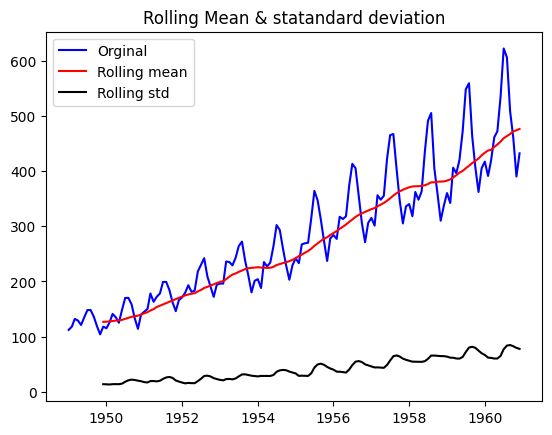

In [ ]:
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

plt.plot(data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [ ]:
#checking the stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(data['#Passengers'])
result[1]

np.float64(0.991880243437641)

In [ ]:
p_value=result[1]
p_value

np.float64(0.991880243437641)

In [ ]:
#refrence purpose
if p_value <=0.05:
  print('Stationarity is present')
else:
  print('No stattionarity is present')

No stattionarity is present


<Axes: xlabel='Month'>

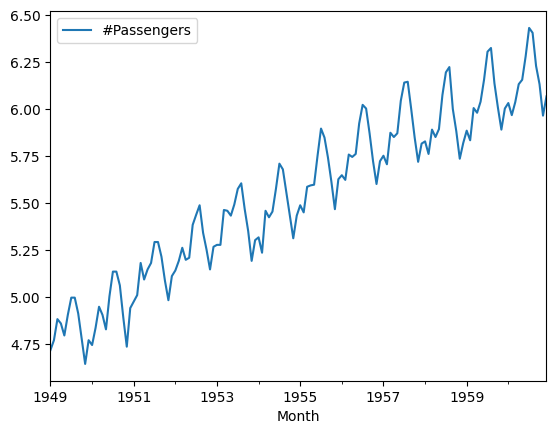

In [ ]:
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

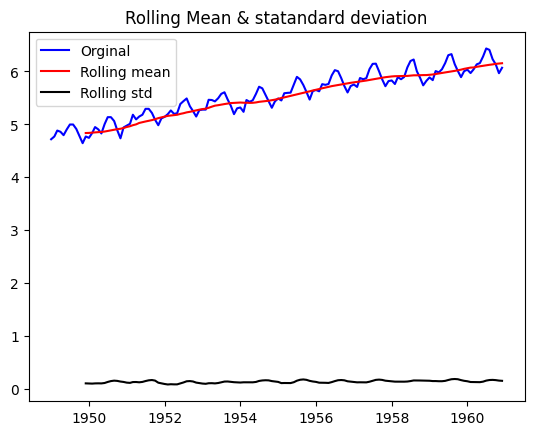

In [ ]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [ ]:
result=adfuller(first_log['#Passengers'])
result[1]

np.float64(0.4223667747703874)

In [ ]:
new_data=first_log - mean_log

In [ ]:
new_data.head(16)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
new_data=new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
Cresult=adfuller(new_data['#Passengers'])
result[1]

np.float64(0.4223667747703874)

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

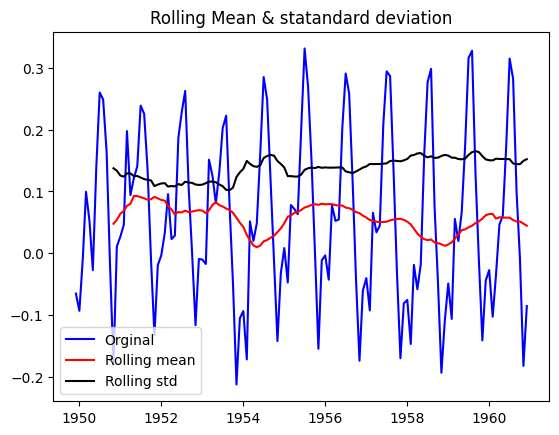

In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
#seasonal decompose
old_decompose_result=seasonal_decompose(data['#Passengers'].dropna())

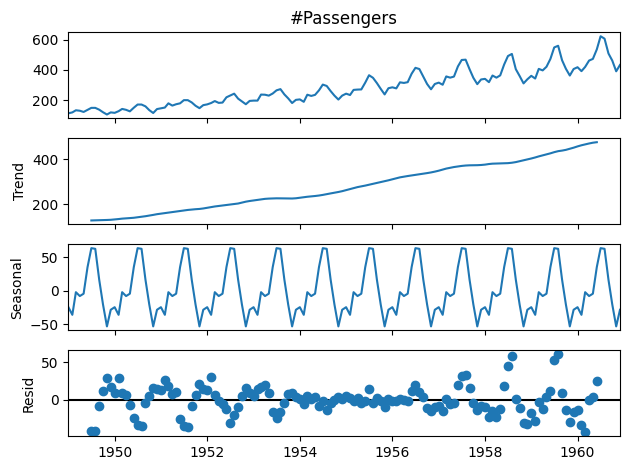

In [ ]:
old_decompose_result.plot();

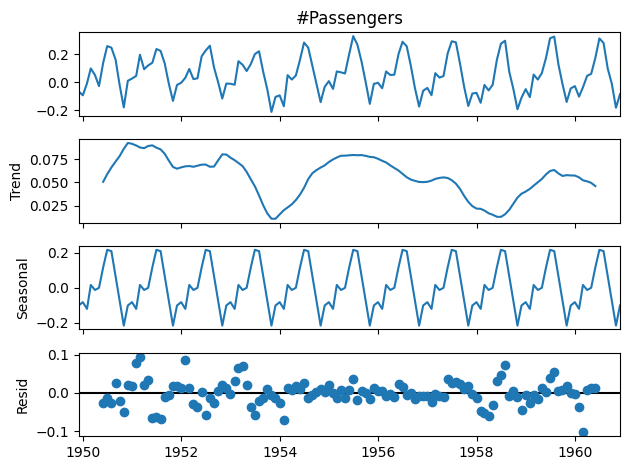

In [ ]:
decompose_result=seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot();

In [ ]:
!pip install pmdarima

['Collecting pmdarima',
 '  Downloading pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)',
 'Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (1.5.1)',
 'Requirement already satisfied: Cython!=0.29.18,!=0.29.31,>=0.29 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (3.0.12)',
 'Requirement already satisfied: numpy>=1.21.2 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (2.0.2)',
 'Requirement already satisfied: pandas>=0.19 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (2.2.2)',
 'Requirement already satisfied: scikit-learn>=0.22 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (1.6.1)',
 'Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (1.16.1)',
 'Requirement already satisfied: statsmodels>=0.13.2 in /usr/local/lib/python3.12/dist-packages (from pmdarima) (0.14.5)',
 '

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

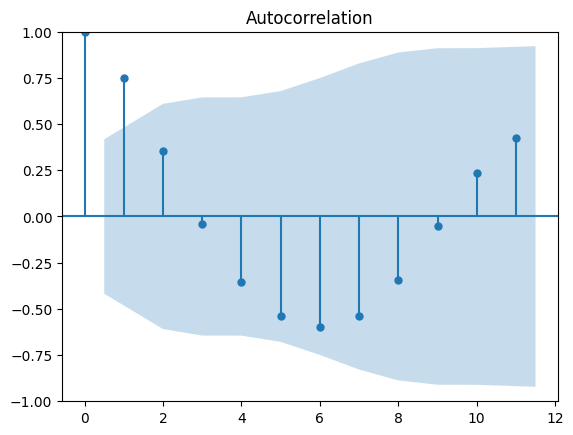

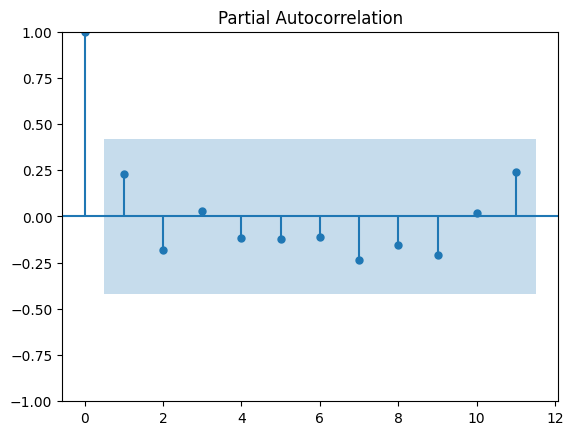

In [ ]:
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot);
plot_pacf(pacf_plot);

#P-How much to look at past data
#D-How to adjust data if there's a tread
#Q-And how much to correct based on previous mistake

In [ ]:
import itertools

p=range(5)
d=range(0,2)
q=range(5)

pdq_combination=list(itertools.product(p,d,q))
pdq_combination


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [ ]:
len(pdq_combination)

50

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

In [ ]:
rmse = []
order1 =[]
for pdq in pdq_combination:
    model = ARIMA(train, order = pdq)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
results.sort_values("RMSE")

,RMSE
"(4, 1, 3)",0.093835
"(3, 0, 4)",0.094216
"(3, 0, 3)",0.095530
"(4, 0, 2)",0.097271
"(2, 0, 3)",0.098217
"(2, 0, 1)",0.100443
"(3, 1, 3)",0.102549
"(3, 0, 1)",0.103528
"(2, 0, 2)",0.105781
"(4, 0, 3)",0.106300


In [ ]:
from statsmodels.tsa.arima.model import ARIMA  #AR(P)+I(D)+MA(Q)
model = ARIMA(train, order=(4,1,3))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 4)   Log Likelihood                 148.654
Date:                Sat, 23 Aug 2025   AIC                           -279.309
Time:                        04:02:17   BIC                           -254.221
Sample:                    12-01-1949   HQIC                          -269.120
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0553      0.008      6.866      0.000       0.040       0.071
ar.L1          0.9205      0.226      4.071      0.000       0.477       1.364
ar.L2          0.4065      0.394      1.031      0.302      -0.366       1.179
ar.L3         -0.8024      0.224     -3.582      0.000      -1.241      -0.363
ma.L1         -0.3048      0.282     -1.080      0.280      -0.858       0.249
ma.L2         -1.1122      0.263     -4.236      0.000      -1.627      -0.598
ma.L3          0.5613      0.166      3.379      0.001       0.236       0.887
ma.L4          0.4603      0.255      1.804      0.071      -0.040       0.960
sigma2         0.0047      0.001      5.719      0.000       0.003       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.84   Prob(JB):                         0.30
Heteroskedasticity (H):               0.91   Skew:                            -0.10
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

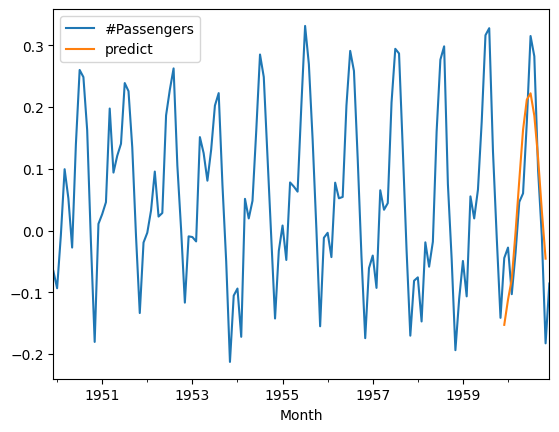

In [ ]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [ ]:
model=SARIMAX(train,order=(4,1,3),seasonal_order=(4,1,3,12))
model=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observation

In [ ]:
len(data)

144

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

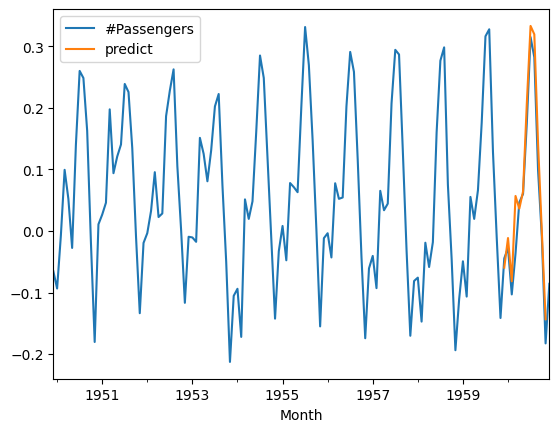

In [ ]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

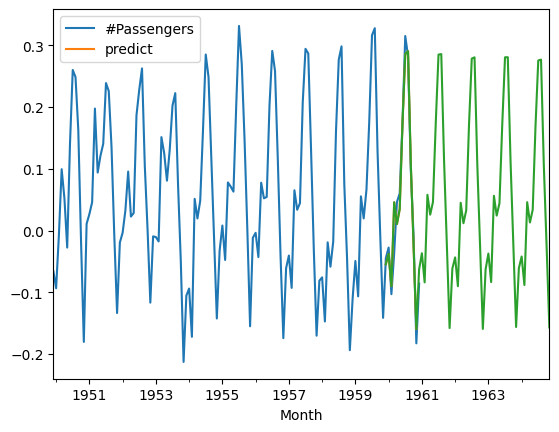

In [ ]:
forecast=model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [ ]:
forecast

,predicted_mean
1959-12-01,-0.054500
1960-01-01,-0.037717
1960-02-01,-0.090144
1960-03-01,0.045806
1960-04-01,0.010407
1960-05-01,0.034791
1960-06-01,0.172609
1960-07-01,0.285778
1960-08-01,0.290564
1960-09-01,0.108271
